In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_dir = "cifar-10-img/train"
test_dir = "cifar-10-img/test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [4]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [15]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8640 - loss: 0.4597 - val_accuracy: 0.5970 - val_loss: 1.7906
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9268 - loss: 0.2179 - val_accuracy: 0.6180 - val_loss: 1.8639
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9412 - loss: 0.1911 - val_accuracy: 0.6190 - val_loss: 1.9282
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9386 - loss: 0.1880 - val_accuracy: 0.6180 - val_loss: 2.1059
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9510 - loss: 0.1593 - val_accuracy: 0.6120 - val_loss: 2.0477
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9684 - loss: 0.1039 - val_accuracy: 0.6000 - val_loss: 2.3885
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9712 - loss: 0.0919 - val_accuracy: 0.5890 - val_loss: 2.6497
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9620 - loss: 0.1267 - val_accuracy: 0.6350 - val_lo

In [17]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3326 - loss: 1.8169 - val_accuracy: 0.4900 - val_loss: 1.4195
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5604 - loss: 1.2320 - val_accuracy: 0.5730 - val_loss: 1.1999
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6540 - loss: 0.9913 - val_accuracy: 0.5520 - val_loss: 1.3077
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7178 - loss: 0.8081 - val_accuracy: 0.6150 - val_loss: 1.1667
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7676 - loss: 0.6696 - val_accuracy: 0.5790 - val_loss: 1.4941
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8006 - loss: 0.5952 - val_accuracy: 0.5910 - val_loss: 1.3852
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8326 - loss: 0.4785 - val_accuracy: 0.6050 - val_loss: 1.4128
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8742 - loss: 0.3670 - val_accuracy: 0.6530 - v

In [18]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step


In [19]:
labels = list(test_generator.class_indices.keys())

Preditcted:  dog
Actual:  dog


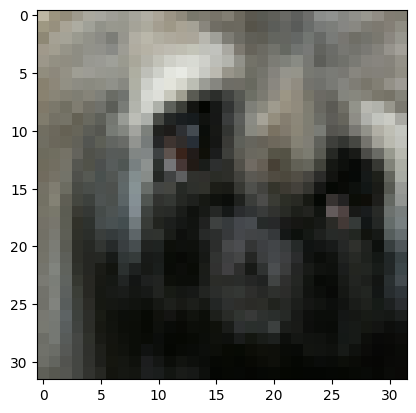

In [26]:
n = 894
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])